## Erdos-Renyi model

In [23]:
import graspy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from graspy.simulations import er_nm, er_np

n = 50
m = 250
p = 0.3

np.random.seed(69)
G1 = er_np(n=n, p=p)
G2 = er_nm(n=n, m=m)

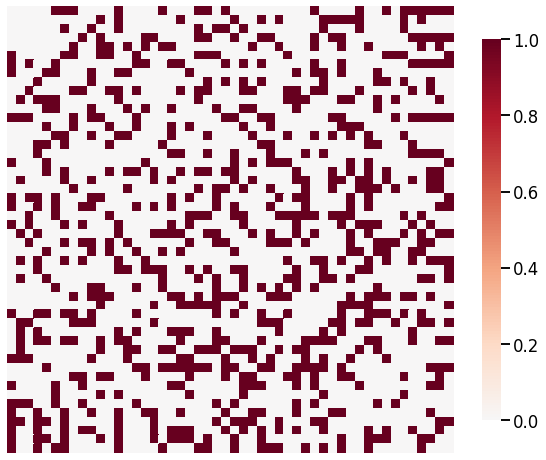

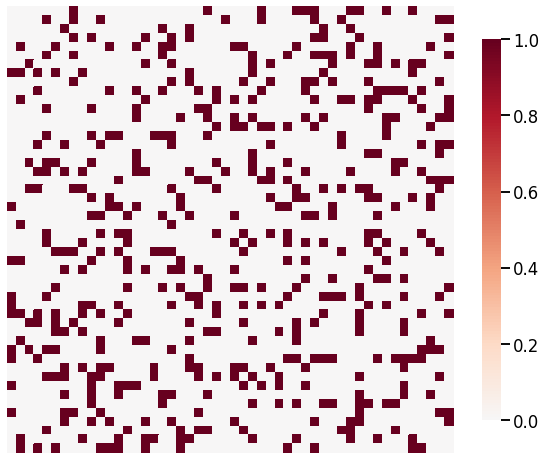

In [10]:
from graspy.plot import heatmap

heatmap(G1)
heatmap(G2)

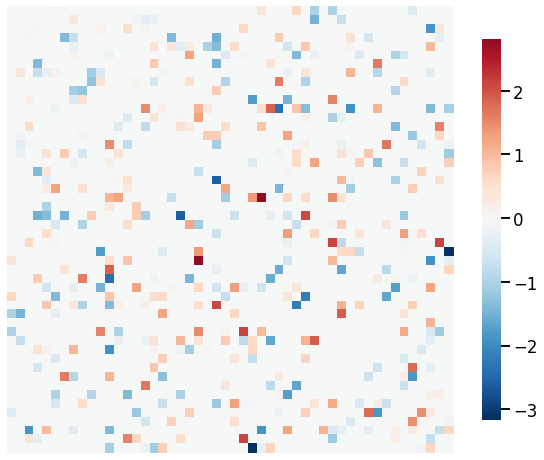

In [14]:
wt = np.random.normal
wtargs = dict(loc=0, scale=1)

G1 = er_np(n=50, p=0.2, wt=wt, wtargs=wtargs)
heatmap(G1)

## Stochastic Block Model

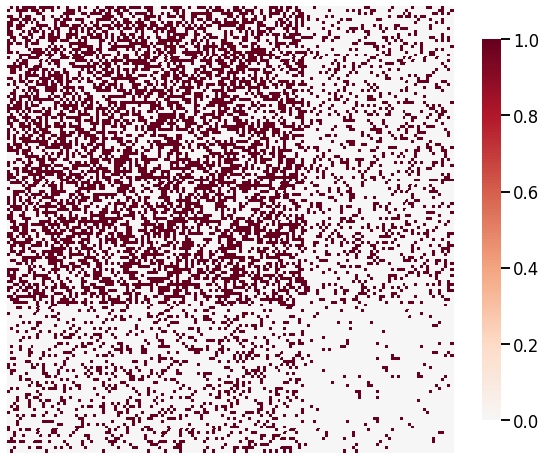

In [21]:
from graspy.simulations import sbm

p = [[.5, .2], 
     [.2, .05]]
n = [100, 50]

G = sbm(n, p)

heatmap(G)

## Weighted SBM

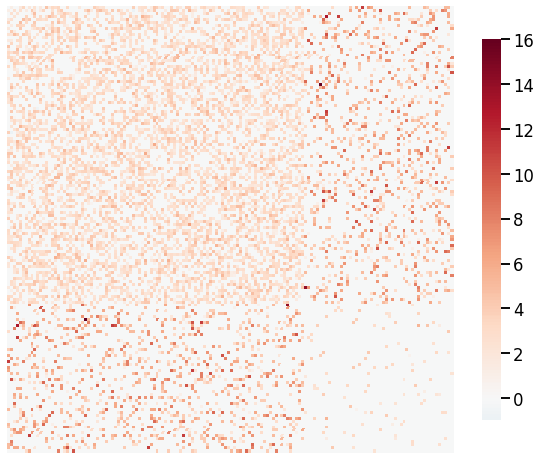

In [39]:
from numpy.random import normal, poisson

p = [[.5, .2], 
     [.2, .05]]
n = [100, 50]
wt = [[normal, poisson],
      [poisson, normal]]
wtargs = [[dict(loc=3, scale=1), dict(lam=5)],
          [dict(lam=5), dict(loc=3, scale=1)]]

G = sbm(n, p, wt=wt, wtargs=wtargs)

heatmap(G);

## Random Dot Product Graph

### with erdos-reyni

In [43]:
from graspy.simulations import rdpg

# create a latent position matrix
X = np.full((100, 2), 0.5)
X @ X.T

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

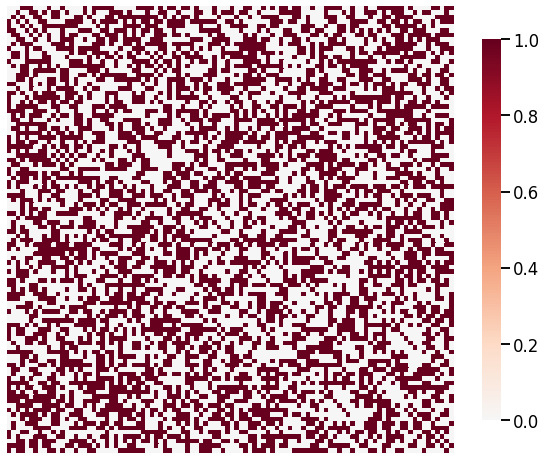

In [46]:
A = rdpg(X)

heatmap(A)

### with SBM

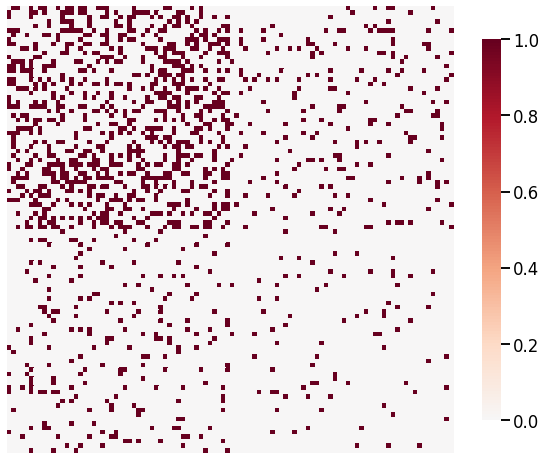

In [51]:
X = np.array([[.5, .2, .2]]*50 + [[.1, .1, .1]]*50)
A_rdpg = rdpg(X)
heatmap(A_rdpg)

## Correlated Graph Pairs

Generate multiple graphs whose edges are correlated in some way.

In [52]:
from graspy.simulations import er_corr

In [55]:
n = 50
r = 0.7
p = 0.5

np.random.seed(2)
G1, G2 = er_corr(n, p, r, directed=False, loops=False)

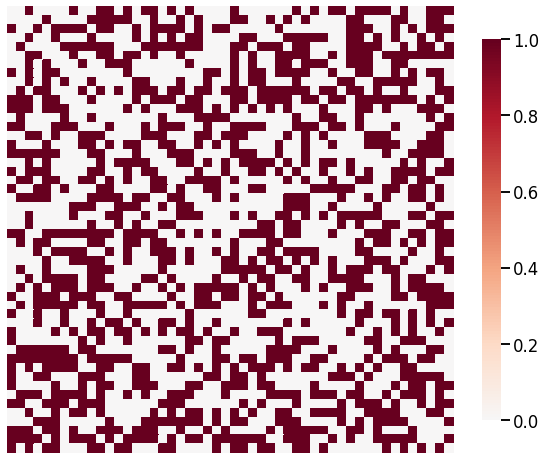

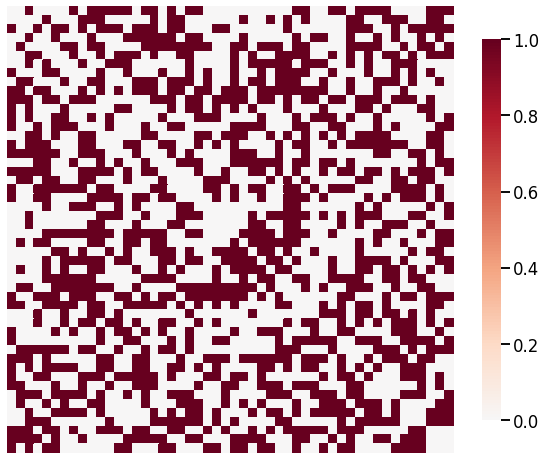

In [56]:
heatmap(G1)
heatmap(G2)

### SBM correlated graph pair

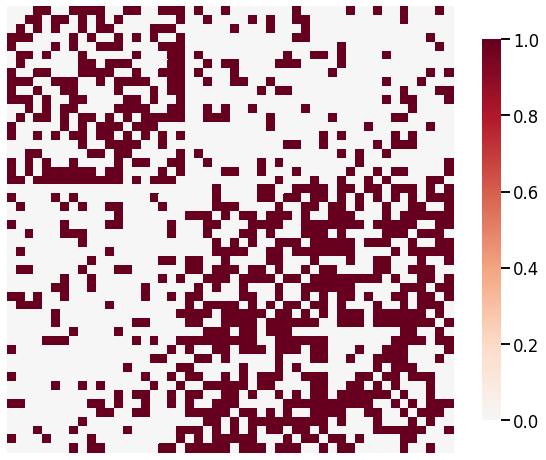

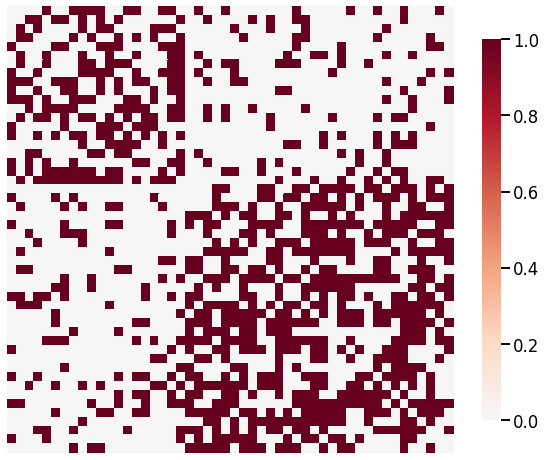

In [64]:
from graspy.simulations import sbm_corr
n = [20, 30]
p = [[.5, .2], [.2, .5]]
r = 0.9

G1, G2 = sbm_corr(n, p, r)

heatmap(G1)
heatmap(G2)

# Correlated RDPG Graph Pair

In [70]:
from graspy.simulations import rdpg_corr
import seaborn as sns
import pandas as pd
sns.set_context("talk")

In [75]:
X = np.array([[0.5, 0.2, 0.2]] * 50 + [[0.1, 0.1, 0.1]] * 50)
Y = None
r = .99

G1, G2 = rdpg_corr(X, Y, r)

pd.DataFrame((X @ X.T))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
1,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
2,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
3,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
4,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
96,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
97,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
98,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03


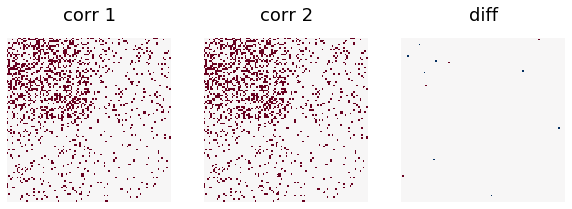

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title="corr 1")
heatmap(G2, ax=axs[1], cbar=False, title="corr 2")
heatmap(G1-G2, ax=axs[2], cbar=False, title="diff")
ndim = G1.shape[0]

### Varying correlation

Difference rate when correlation = -0.5 is  0.0466


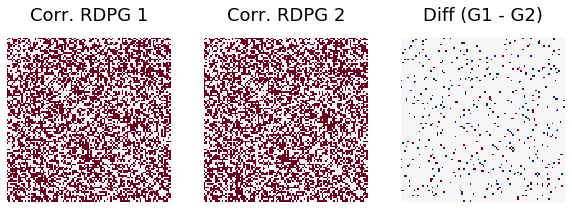

In [97]:
X = np.random.dirichlet([10, 10], size=100)
Y = None
r = .9  # breaks here when r<-.4

G1, G2 = rdpg_corr(X, Y, r)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title="Corr. RDPG 1")
heatmap(G2, ax=axs[1], cbar=False, title="Corr. RDPG 2")
heatmap(G1 - G2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")
ndim=G1.shape[0]
print("Difference rate when correlation = -0.5 is ", np.sum(abs(G1-G2))/(ndim*ndim))

In [98]:
rlist = []
for i in range(-5, 10):
    g1, g2 = rdpg_corr(X, Y, i/10)
    ndim = g1.shape[0]
    rate = np.sum(abs(g1-g2)/(ndim*ndim))
    rlist.append(rate)
    

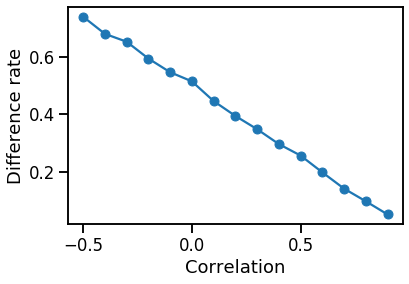

In [101]:
x_list = np.linspace(-.5, .9, 15)
plt.plot(x_list, rlist, 'o-')
plt.xlabel("Correlation")
plt.ylabel("Difference rate");